### Calculate and compare metastatic burden across treatments and clone types

- Fig 3s,t,v,u
- Supp fig 2a

In [ ]:
#Read in file
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Print version of libraries
print(f"Pandas Version: {pd.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Matplotlib Version: {plt.matplotlib.__version__}")

merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")

merged_df.head()

Pandas Version: 2.2.1
Seaborn Version: 0.13.2
Matplotlib Version: 3.8.4


C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_29716\2183706801.py:11: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")


,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,id,clone_type,treatment,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.0,2.202260e+08,0.000000,...,1064,1_2_4_6,IV,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal
1,50.0,0.998808,0.001192,0.0,0.000000,0.000000,0.000000,0.0,6.563523e+04,282.432010,...,1064,1_2,IV,2.775850e+10,8.529756e+08,1.510170e+08,13.000000,18.336258,1.410481,polyclonal
2,89.0,0.175399,0.099498,0.0,0.545721,0.179381,0.000000,0.0,1.246517e+08,15.761827,...,1064,1_2_4_5,IV,2.775850e+10,8.529756e+08,1.510170e+08,167.418006,376.000000,2.245876,polyclonal
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.0,1.326004e+06,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.0,1.016321e+07,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal


In [2]:
merged_df.columns

Index(['MET_ID', '1', '10', '11', '100', '101', '110', '111',
       'Volume corrected', 'min_dist', 'max_dist', 'mean_dist',
       'Nearest Vessel Thickness', 'Vessel Volume', 'Clone1', 'Clone2',
       'Clone3', 'Clone4', 'Clone5', 'Clone6', 'Clone7', 'Box.X.Min',
       'Box.X.Max', 'Box.Y.Min', 'Box.Y.Max', 'Box.Z.Min', 'Box.Z.Max',
       'MetNum_that_touches', 'number_of_touchPoints', 'total_touching_volume',
       'total_touching_surface_area/2', 'centroid_x', 'centroid_y',
       'centroid_z', 'id', 'clone_type', 'treatment', 'total_lung_volume',
       'vessel_volume', 'vessel_surface_area', 'minor_axis', 'major_axis',
       'elongation', 'met_type_cat'],
      dtype='object')

## MET BURDEN

In [4]:
#Sanity check
print("Total No of METs for each mouse")
total_mets_per_mouse = merged_df.groupby(['treatment', 'id','total_lung_volume']).size().reset_index(name='total_no')
#total_mets_per_mouse.to_csv("./final_graphs/total_mets_per_mouse.csv")
total_mets_per_mouse['normalized_no'] = total_mets_per_mouse['total_no']/total_mets_per_mouse['total_lung_volume']
total_mets_per_mouse

Total No of METs for each mouse


,treatment,id,total_lung_volume,total_no,normalized_no
0,IV,883,7.889547e+10,2781,3.524917e-08
1,IV,934,4.450137e+10,405,9.100843e-09
2,IV,935,1.834717e+11,5356,2.919251e-08
3,IV,1064,2.775850e+10,2896,1.043284e-07
4,IV,1066,6.608208e+10,2356,3.565263e-08
5,MFP,1067,3.352110e+10,1380,4.116810e-08
6,MFP,1069,1.932486e+10,1426,7.379097e-08
7,MFP,1070,4.245769e+10,3406,8.022104e-08
8,MFP,1381,7.950446e+10,1146,1.441429e-08


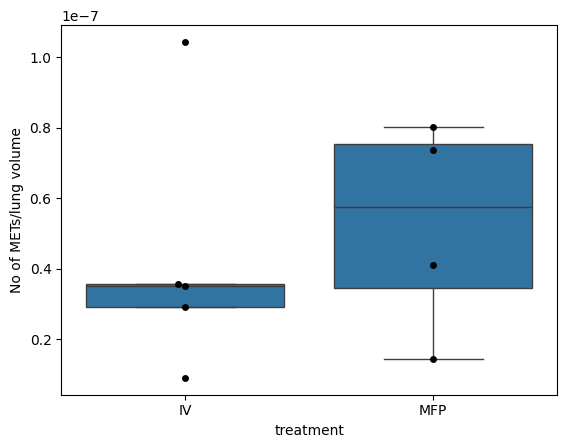

In [10]:
sns.boxplot(x='treatment', y='normalized_no', data=total_mets_per_mouse,showfliers=False)
sns.swarmplot(x='treatment', y='normalized_no', data=total_mets_per_mouse, color="black",dodge=True)
plt.ylabel("No of METs/lung volume")
plt.savefig("./final_graphs/fig3/3s_total_no_mets_norm_lung_volume.eps", format='eps',dpi=300)

independent t-test

In [22]:
#t-test
from scipy.stats import ttest_ind

#print version of scipy
import scipy
print(f"Scipy Version: {scipy.__version__}")

iv_mets = total_mets_per_mouse[total_mets_per_mouse['treatment']=='IV']['normalized_no']
mfp_mets = total_mets_per_mouse[total_mets_per_mouse['treatment']=='MFP']['normalized_no']
ttest_ind(iv_mets, mfp_mets)

Scipy Version: 1.13.0


TtestResult(statistic=-0.4270532910517018, pvalue=0.6821685912298878, df=7.0)

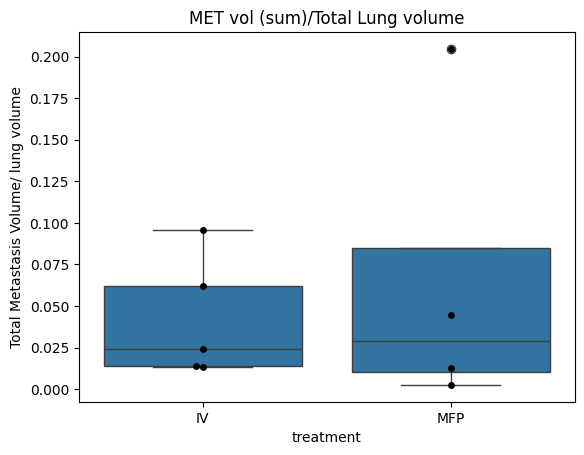

In [15]:
#Add all Met volumes and divide by total lung volume
#Add all the Met Volumes
met_volume_df = merged_df.groupby(['treatment','id','total_lung_volume']).agg({'Volume corrected':'sum'}).reset_index()
#Divide the sum of all MET volumes by the total lung volume for each animal
met_volume_df['perc_vol_met_lung'] = met_volume_df['Volume corrected']/met_volume_df['total_lung_volume']
met_volume_df.to_csv("./final_graphs/fig3/total_mets_burden_mouse.csv")

sns.boxplot(data=met_volume_df, x='treatment', y='perc_vol_met_lung')#, inner='point')
sns.swarmplot(data=met_volume_df, x='treatment', y='perc_vol_met_lung', color='black',dodge=True)
plt.title("MET vol (sum)/Total Lung volume")
plt.ylabel("Total Metastasis Volume/ lung volume")
plt.savefig("./final_graphs/fig3/3t_perc_lung_vol_met_boxplot.eps", format="eps",dpi=300)

t-test

In [24]:
iv_met_vol = met_volume_df[met_volume_df['treatment']=='IV']['perc_vol_met_lung']
mfp_met_vol = met_volume_df[met_volume_df['treatment']=='MFP']['perc_vol_met_lung']
ttest_ind(iv_met_vol, mfp_met_vol)

TtestResult(statistic=-0.5382834790776115, pvalue=0.6070648277676223, df=7.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


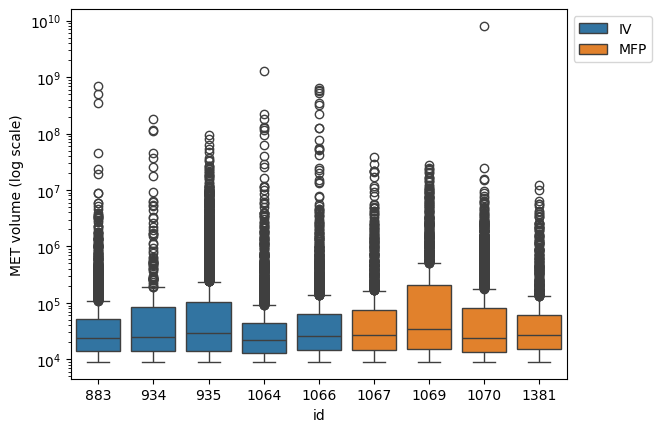

In [16]:
sns.boxplot(merged_df, x='id', y='Volume corrected',hue='treatment',showfliers=True)
plt.yscale('log')
plt.ylabel("MET volume (log scale)")
#move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#draw horizontal dotted line at 10^4
plt.savefig("./final_graphs/supplementary/supp_fig2a_vol_distribution_mouse.eps", format="eps",dpi=300)

#### Plot percentage volume of Mets based on treatment and MET type

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_29716\2455490038.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(data=met_volume_df, x='treatment', y='perc_vol_met_lung', hue='met_type_cat', color='black',dodge=True,legend=False)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


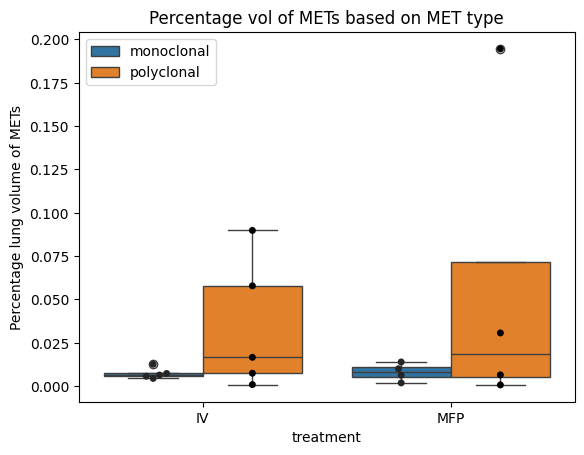

In [28]:
met_volume_df = merged_df.groupby(['treatment','id','total_lung_volume','met_type_cat']).agg({'Volume corrected':'sum'}).reset_index()
#Divide the sum of all MET volumes by the total lung volume for each animal
met_volume_df['perc_vol_met_lung'] = met_volume_df['Volume corrected']/met_volume_df['total_lung_volume']

sns.boxplot(data=met_volume_df, x='treatment', y='perc_vol_met_lung', hue='met_type_cat')
sns.swarmplot(data=met_volume_df, x='treatment', y='perc_vol_met_lung', hue='met_type_cat', color='black',dodge=True,legend=False)
plt.title("Percentage vol of METs based on MET type")
plt.ylabel("Percentage lung volume of METs")
plt.legend(loc="upper left")
plt.savefig("./final_graphs/fig3/3V_perc_vol_mets_type_boxplot.eps", format="eps",dpi=300)

##### Statistics (t-test)

In [30]:
#run ttest

iv_monoclonal_perc_lung_vol = met_volume_df[(met_volume_df['treatment']=='IV') & (met_volume_df['met_type_cat']=='monoclonal')]['perc_vol_met_lung']
mfp_monoclonal_perc_lung_vol = met_volume_df[(met_volume_df['treatment']=='MFP') & (met_volume_df['met_type_cat']=='monoclonal')]['perc_vol_met_lung']

iv_polyclonal_perc_lung_vol = met_volume_df[(met_volume_df['treatment']=='IV') & (met_volume_df['met_type_cat']=='polyclonal')]['perc_vol_met_lung']
mfp_polyclonal_perc_lung_vol = met_volume_df[(met_volume_df['treatment']=='MFP') & (met_volume_df['met_type_cat']=='polyclonal')]['perc_vol_met_lung']

iv_mfp_monoclonal = ttest_ind(iv_monoclonal_perc_lung_vol, mfp_monoclonal_perc_lung_vol)
iv_mfp_polyclonal = ttest_ind(iv_polyclonal_perc_lung_vol, mfp_polyclonal_perc_lung_vol)


print(f"Monoclonal IV vs MFP\nT test p values : {iv_mfp_monoclonal.pvalue}")
print(f"Polyclonal IV vs MFP\nT test p values : {iv_mfp_polyclonal.pvalue}")




Monoclonal IV vs MFP
T test p values : 0.80141173345394
Polyclonal IV vs MFP
T test p values : 0.6142681332400892


In [31]:
#paired t-test 

from scipy.stats import ttest_rel


iv_monoclonal_polyclonal = ttest_rel(iv_monoclonal_perc_lung_vol, iv_polyclonal_perc_lung_vol)
mfp_monoclonal_polyclonal = ttest_rel(mfp_monoclonal_perc_lung_vol, mfp_polyclonal_perc_lung_vol)


print(f"IV monoclonal vs polyclonal\nT test p values : {iv_monoclonal_polyclonal.pvalue}")
print(f"MFP monoclonal vs polyclonal\nT test p values : {mfp_monoclonal_polyclonal.pvalue}")

IV monoclonal vs polyclonal
T test p values : 0.20411677305558223
MFP monoclonal vs polyclonal
T test p values : 0.3468803465399258


Get Proportion of Mets in poly vs monoclonal

In [32]:
#Plot proportion of clones counts by met_type_cat
met_type_cat = merged_df.groupby(['treatment','id','met_type_cat']).size().reset_index(name='counts')
met_type_cat_total = merged_df.groupby(['treatment','id']).size().reset_index(name='counts')
met_type_cat_total

,treatment,id,counts
0,IV,883,2781
1,IV,934,405
2,IV,935,5356
3,IV,1064,2896
4,IV,1066,2356
5,MFP,1067,1380
6,MFP,1069,1426
7,MFP,1070,3406
8,MFP,1381,1146


C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_29716\4251091565.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(data=met_proportion_cat, x='treatment', y='proportion',hue='met_type_cat',color='black',dodge=True,legend=False)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


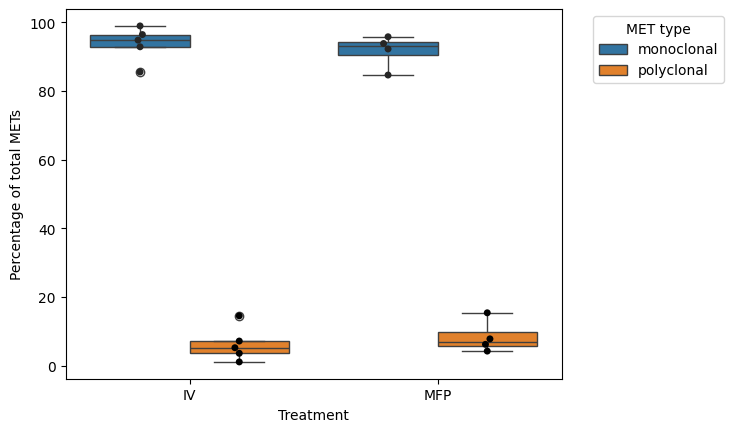

In [36]:
met_proportion_cat = met_type_cat.merge(met_type_cat_total, on=['treatment','id'], how='left')
met_proportion_cat['proportion'] = met_proportion_cat['counts_x']*100/met_proportion_cat['counts_y']
sns.boxplot(data=met_proportion_cat, x='treatment', y='proportion',hue='met_type_cat') 
sns.swarmplot(data=met_proportion_cat, x='treatment', y='proportion',hue='met_type_cat',color='black',dodge=True,legend=False) 
#outer right legend
plt.legend(title='MET type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Percentage of total METs")
plt.xlabel("Treatment")
plt.savefig("./final_graphs/fig3/fig3U_percentage_mets_boxplot.eps", format="eps",dpi=300)


STATS

In [37]:
from scipy.stats import ttest_rel

iv_monoclonal_proportion = met_proportion_cat[(met_proportion_cat['treatment']=='IV') & (met_proportion_cat['met_type_cat']=='monoclonal')]['proportion']
iv_polyclonal_proportion = met_proportion_cat[(met_proportion_cat['treatment']=='IV') & (met_proportion_cat['met_type_cat']=='polyclonal')]['proportion']

ttest_iv = ttest_rel(iv_monoclonal_proportion, iv_polyclonal_proportion)

print(f"IV monoclonal vs polyclonal {ttest_iv.pvalue}")


mfp_monoclonal_proportion = met_proportion_cat[(met_proportion_cat['treatment']=='MFP') & (met_proportion_cat['met_type_cat']=='monoclonal')]['proportion']
mfp_polyclonal_proportion = met_proportion_cat[(met_proportion_cat['treatment']=='MFP') & (met_proportion_cat['met_type_cat']=='polyclonal')]['proportion']

ttest_mfp = ttest_rel(mfp_monoclonal_proportion, mfp_polyclonal_proportion)

print(f"MFP monoclonal vs polyclonal {ttest_mfp.pvalue}")

IV monoclonal vs polyclonal 4.341071569504485e-05
MFP monoclonal vs polyclonal 0.0004384544762355485
